# 04. Oil Price Analysis and Green construnction

## 1. 셀레니움(Selenium) 설치
- 윈도우, mac(intel)
    - conda install selenium
- mac(m1)
    - pip install selenium

## 2. 크롬 드라이버 설치
- https://chromedriver.chromium.org/downloads

In [8]:
from selenium import webdriver

In [17]:
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get("http://www.pinkwink.kr")

import time

time.sleep(10)
driver.quit()

---

## 2. 셀프 주유소가 정말 저렴하나요? - 데이터 확보하기 작업
- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인
- 목표 데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

## 3. 셀리니움으로 접근

In [86]:
import time
from selenium import webdriver

url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(url)

In [87]:
# 팝업창 화면 개수 확인
print("활성화된 윈도우 창 : {0}개".format(len(driver.window_handles)))

활성화된 윈도우 창 : 2개


In [88]:
# 팝업창 화면 종료하고 메인 화면만 활성화 하기
# 참고 : https://m.blog.naver.com/tkdtjdtkddms/221976262160

for index in range(len(driver.window_handles)):
    if index != 0 :
        driver.switch_to.window(driver.window_handles[index]) 
        driver.close()
        time.sleep(2)
else:
    driver.switch_to.window(driver.window_handles[0])
    # 싼 주유소 화면이 나올 수 있도록 다시 한 번 driver.get()
    driver.get(url)

In [89]:
# 지역 : 시/도
sido_list_html = driver.find_element_by_id("SIDO_NM0")

In [90]:
# 지역 : 시/도 데이터 확인
sido_list_option = sido_list_html.find_elements_by_tag_name("option")
for i in range(len(sido_list_option)):
    print(sido_list_option[i].text, sido_list_option[i].get_attribute("value"), sep=" \t|\t " )

시/도 	|	 
서울 	|	 서울특별시
부산 	|	 부산광역시
대구 	|	 대구광역시
인천 	|	 인천광역시
광주 	|	 광주광역시
대전 	|	 대전광역시
울산 	|	 울산광역시
세종 	|	 세종특별자치시
경기 	|	 경기도
강원 	|	 강원도
충북 	|	 충청북도
충남 	|	 충청남도
전북 	|	 전라북도
전남 	|	 전라남도
경북 	|	 경상북도
경남 	|	 경상남도
제주 	|	 제주특별자치도


In [91]:
# 지역 : 시/도 데이터 리스트 변수 선언
sido_names = [ sido_list_option[i].get_attribute("value") for i in range(len(sido_list_option))][1:]
print(sido_names)

['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']


In [96]:
# 지역 : 시/도 셀렉트박스에 지역 데이터 입력
# 지역 : 서울 선택
sido_list_html.send_keys(sido_names[0])
print(sido_names[0])

서울특별시


In [98]:
# 지역 : 시/군/구 
# 지역 : 서울의 시/군/구 데이터 가져오기
sigungu_list_html = driver.find_element_by_id("SIGUNGU_NM0")
sigungu_list_option = sigungu_list_html.find_elements_by_tag_name("option")
sigungu_names = [ sigungu_list_option[i].get_attribute("value") for i in range(len(sigungu_list_option))][1:]

for i in range(len(sigungu_names)):
    print(sigungu_names[i], end=", ")

강남구, 강동구, 강북구, 강서구, 관악구, 광진구, 구로구, 금천구, 노원구, 도봉구, 동대문구, 동작구, 마포구, 서대문구, 서초구, 성동구, 성북구, 송파구, 양천구, 영등포구, 용산구, 은평구, 종로구, 중구, 중랑구, 

In [99]:
sigungu_list_html.send_keys(sigungu_names[0])

In [100]:
# 엑셀저장 버튼 
# css
driver.find_element_by_css_selector("#glopopd_excel").click()

In [101]:
# 엑셀저장 버튼
# xpath
driver.find_element_by_xpath('''//*[@id="glopopd_excel"]''').click()

In [108]:
# 반복문을 이용하여 서울시의 모든 시/군/구 엑셀 데이터 다운로드 받기

import time
from tqdm import tqdm_notebook

for sigungu in tqdm_notebook(sigungu_names):
    sigungu_list_html = driver.find_element_by_id("SIGUNGU_NM0")
    sigungu_list_html.send_keys(sigungu )
    time.sleep(2)
    
    driver.find_element_by_xpath('''//*[@id="glopopd_excel"]''').click()
    time.sleep(2)
else:
    driver.close()
    

C:\Users\jmkim\AppData\Local\Temp/ipykernel_28928/3393846760.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sigungu in tqdm_notebook(sigungu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

## 4. 데이터 정리하기

In [113]:
import pandas as pd
from glob import glob

files = glob("../data/지역_*.xls")
files[0]

'../data\\지역_위치별(주유소) (1).xls'

In [120]:
# 데이터 하나만 확인하기
pd.read_excel(files[0], header=2).head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1648,1448,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1693,1487,-
2,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1712,1512,-
3,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,1939,1719,1519,-
4,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1720,1520,-


In [121]:
df_raws = []

for file in files:
    df = pd.read_excel(file, header=2)
    df_raws.append(df)

In [124]:
stations_raw = pd.concat(df_raws)
stations_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1648,1448,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1693,1487,-
2,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1712,1512,-
3,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,1939,1719,1519,-
4,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1720,1520,-
...,...,...,...,...,...,...,...,...,...,...
33,서울특별시,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,02-518-5141,N,2358,2158,1904,1359
34,서울특별시,뉴서울(강남),서울 강남구 언주로 716,SK에너지,02-518-5631,N,2495,2275,1995,-
35,서울특별시,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),SK에너지,02-542-6726,N,-,-,-,-
36,서울특별시,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),GS칼텍스,02-3411-3271,N,-,-,-,-


In [125]:
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 37
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      478 non-null    object
 1   상호      478 non-null    object
 2   주소      478 non-null    object
 3   상표      478 non-null    object
 4   전화번호    478 non-null    object
 5   셀프여부    478 non-null    object
 6   고급휘발유   478 non-null    object
 7   휘발유     478 non-null    object
 8   경유      478 non-null    object
 9   실내등유    478 non-null    object
dtypes: object(10)
memory usage: 41.1+ KB


In [160]:
stations = pd.DataFrame({
    "상호" : stations_raw["상호"],
    "주소" : stations_raw["주소"],
    "가격" : stations_raw["휘발유"],
    "셀프여부" : stations_raw["셀프여부"],
    "상표" : stations_raw["상표"],
})
stations.tail()

,상호,주소,가격,셀프여부,상표
33,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2158,N,GS칼텍스
34,뉴서울(강남),서울 강남구 언주로 716,2275,N,SK에너지
35,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지
36,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),-,N,GS칼텍스
37,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지


In [161]:
for address in stations["주소"]:
    print(address.split()[1])
    break

강동구


In [162]:
stations["구"] = [ address.split()[1] for address in stations["주소"] ]

In [163]:
len(stations["구"].unique()), stations["구"].unique()

(25,
 array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
        '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object))

In [164]:
# stations.loc[stations["구"] == "서울특별시", "구"] = "성동구"
# stations.loc[stations["구"] == "특별시", "구"] = "도봉구"

In [165]:
stations.tail()

,상호,주소,가격,셀프여부,상표,구
33,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2158,N,GS칼텍스,강남구
34,뉴서울(강남),서울 강남구 언주로 716,2275,N,SK에너지,강남구
35,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
36,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),-,N,GS칼텍스,강남구
37,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구


In [166]:
# 휘발유 가격 데이터 변환 object(string) -> float
# 가격정보가 있는 주유소만 사용
stations = stations[stations["가격"] != "-"]
stations["가격"] = stations["가격"].astype("float")
stations.tail()

,상호,주소,가격,셀프여부,상표,구
30,경원주유소,서울 강남구 도산대로 428 (청담동),2125.0,N,S-OIL,강남구
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2155.0,N,SK에너지,강남구
32,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2158.0,N,GS칼텍스,강남구
33,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2158.0,N,GS칼텍스,강남구
34,뉴서울(강남),서울 강남구 언주로 716,2275.0,N,SK에너지,강남구


In [167]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 34
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      467 non-null    object 
 1   주소      467 non-null    object 
 2   가격      467 non-null    float64
 3   셀프여부    467 non-null    object 
 4   상표      467 non-null    object 
 5   구       467 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.5+ KB


In [168]:
stations.tail()

,상호,주소,가격,셀프여부,상표,구
30,경원주유소,서울 강남구 도산대로 428 (청담동),2125.0,N,S-OIL,강남구
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2155.0,N,SK에너지,강남구
32,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2158.0,N,GS칼텍스,강남구
33,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2158.0,N,GS칼텍스,강남구
34,뉴서울(강남),서울 강남구 언주로 716,2275.0,N,SK에너지,강남구


In [169]:
stations.reset_index(inplace=True, drop=True)

In [170]:
stations.tail()

,상호,주소,가격,셀프여부,상표,구
462,경원주유소,서울 강남구 도산대로 428 (청담동),2125.0,N,S-OIL,강남구
463,SK논현주유소,서울 강남구 논현로 747 (논현동),2155.0,N,SK에너지,강남구
464,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2158.0,N,GS칼텍스,강남구
465,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2158.0,N,GS칼텍스,강남구
466,뉴서울(강남),서울 강남구 언주로 716,2275.0,N,SK에너지,강남구


## 5. 주오 가격 정보 시각화

In [173]:
# 한글 설정
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic("matplotlib", "inline")
# %matplotlib inline

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)

<AxesSubplot:title={'center':'가격'}, xlabel='셀프여부'>

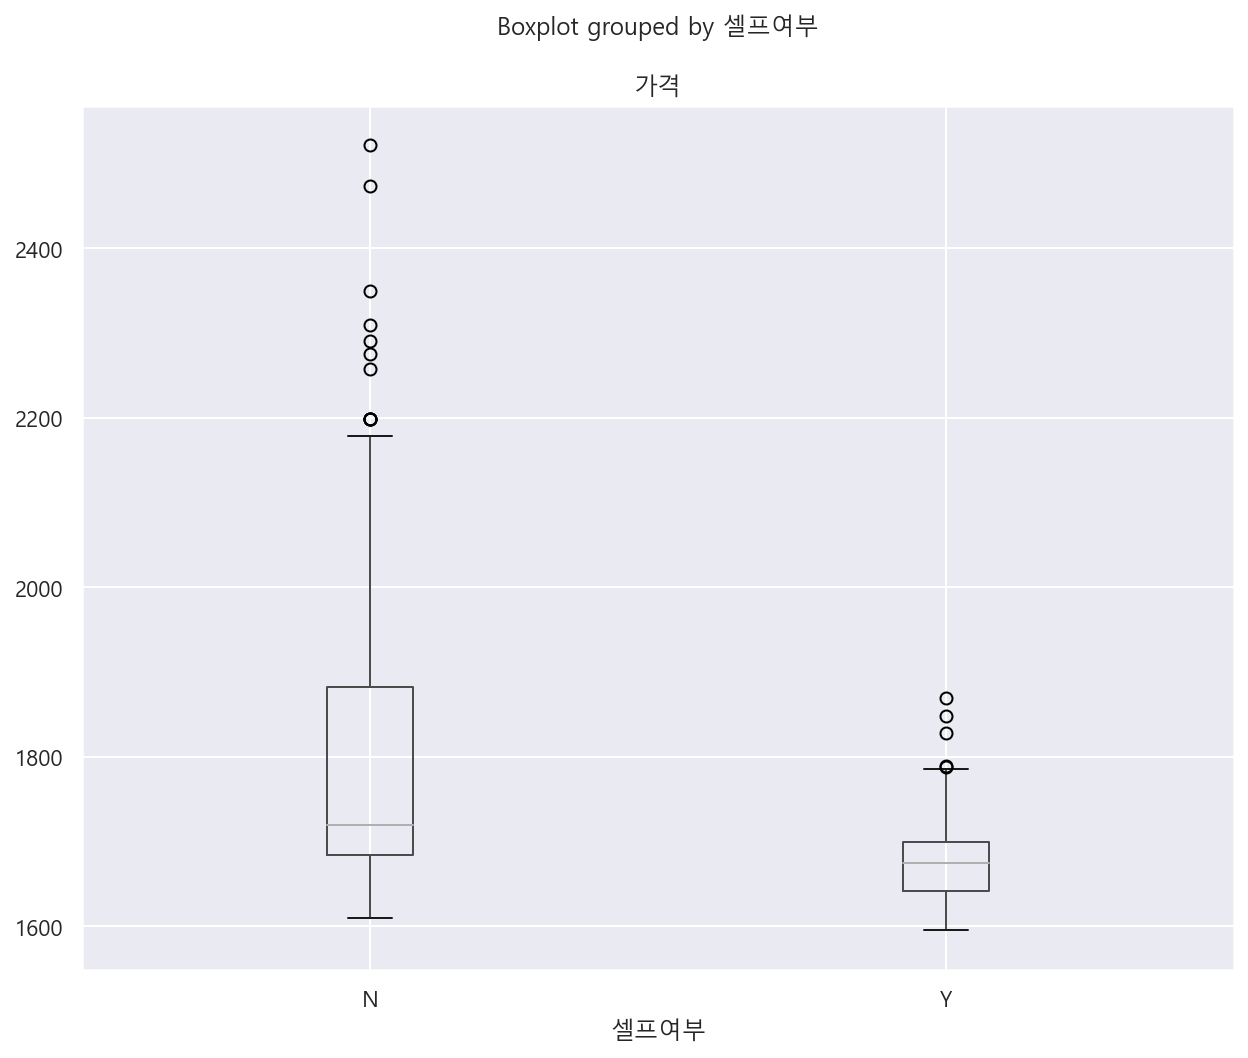

In [175]:
# boxplot(feat.pandas)

stations.boxplot(column="가격", by="셀프여부", figsize=(10,8))

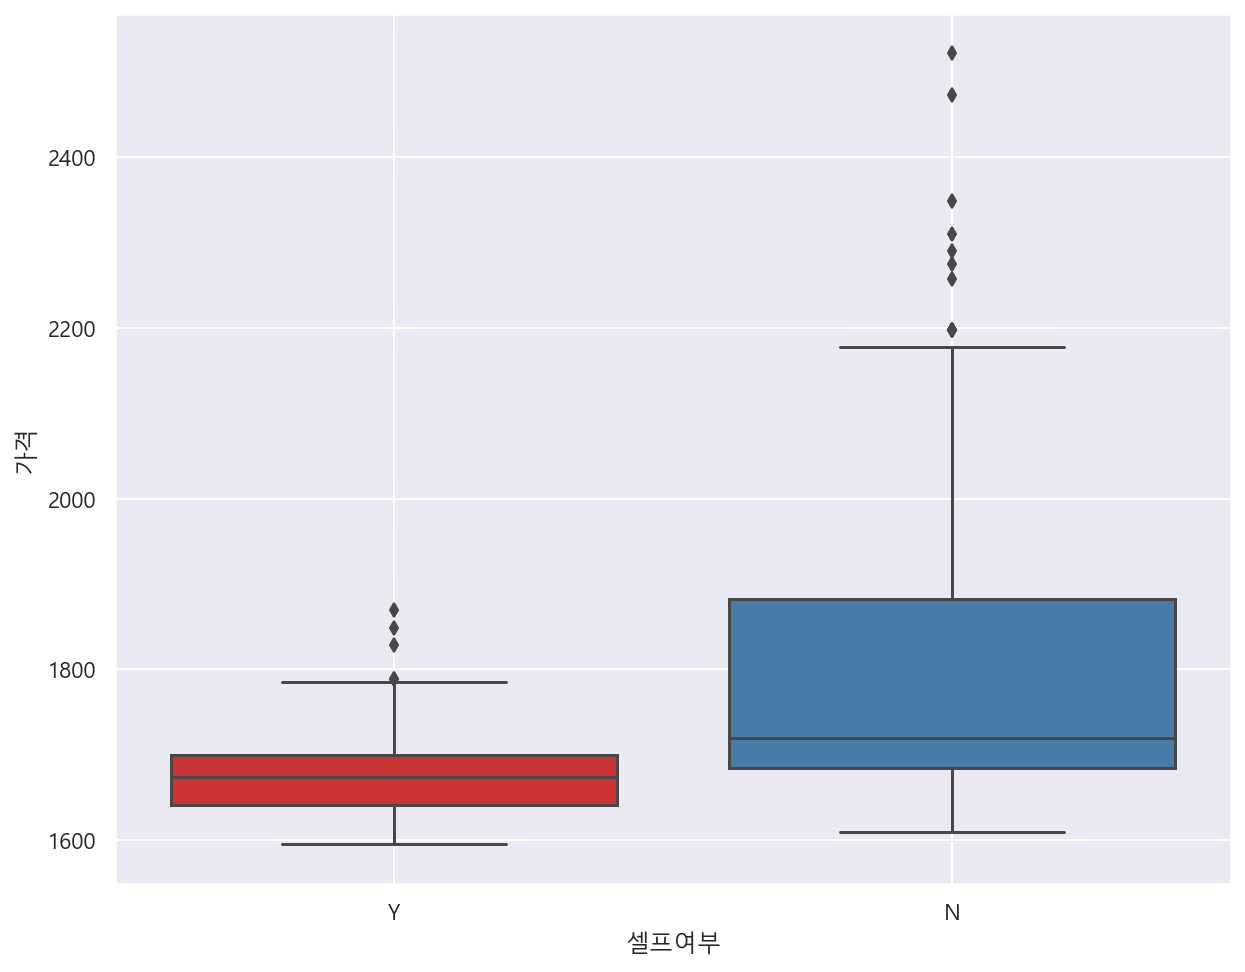

In [177]:
# boxplot(feat. seaborn)

plt.figure(figsize=(10,8))
sns.boxplot(x="셀프여부", y="가격", data=stations, palette="Set1")
plt.grid(True)
plt.show()

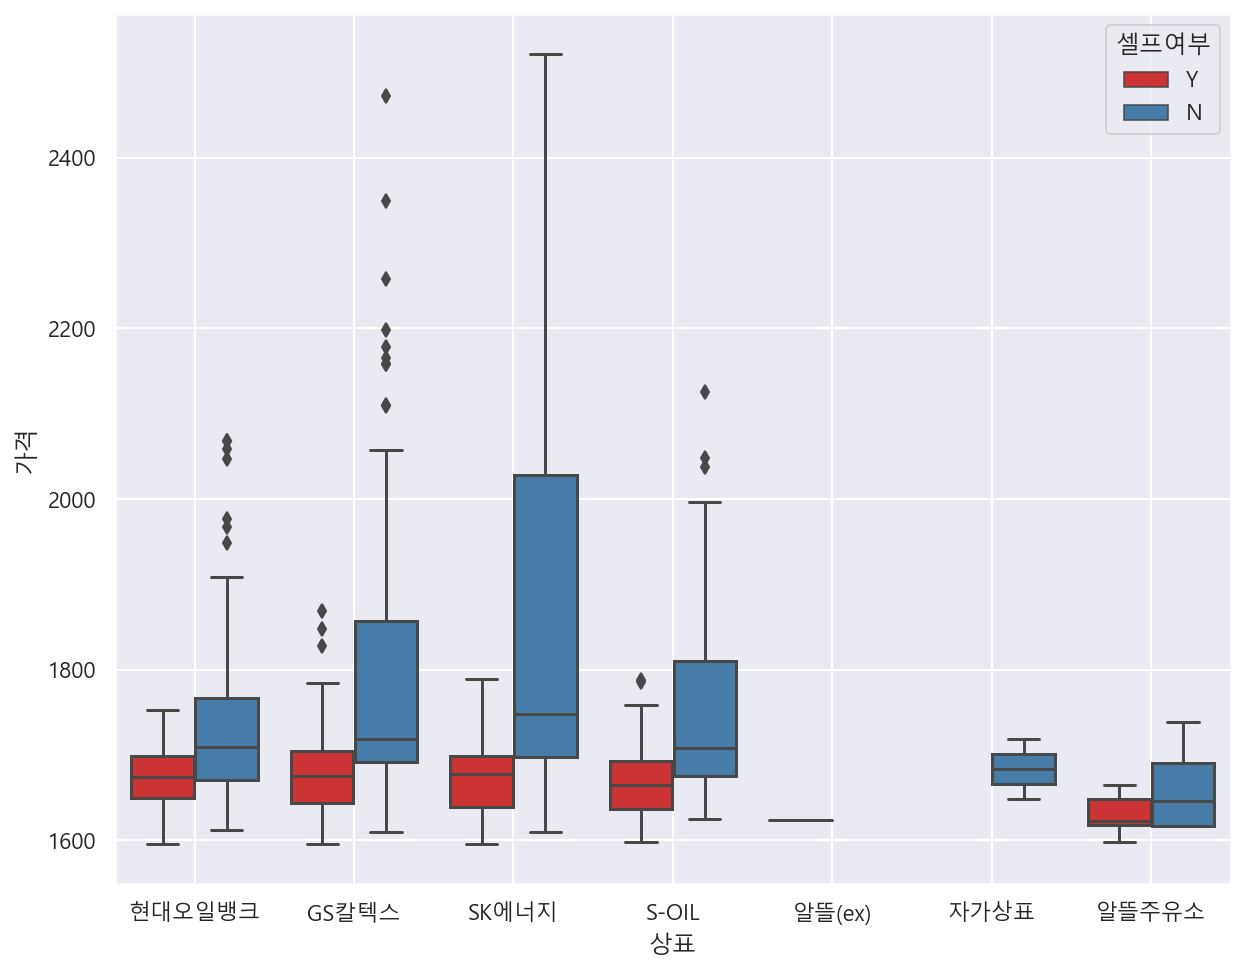

In [178]:
# boxplot(feat. seaborn)
plt.figure(figsize=(10, 8))
sns.boxplot(x="상표", y="가격", hue="셀프여부", data=stations, palette="Set1")
plt.grid(True)
plt.show()

# 지도 시각화

In [183]:
import json
import folium
import warnings
import numpy as np
warnings.simplefilter(action="ignore", category=FutureWarning)

In [184]:
# 가장 비싼 주유소 10개
stations.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프여부,상표,구
291,서남주유소,서울 중구 통일로 30,2522.0,N,SK에너지,중구
256,서계주유소,서울 용산구 청파로 367 (서계동),2473.0,N,GS칼텍스,용산구
290,필동주유소,서울 중구 퇴계로 196 (필동2가),2349.0,N,GS칼텍스,중구
289,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2310.0,N,SK에너지,중구
255,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구
466,뉴서울(강남),서울 강남구 언주로 716,2275.0,N,SK에너지,강남구
288,약수주유소,서울 중구 다산로 173,2258.0,N,GS칼텍스,중구
389,구로주유소,서울 구로구 구로동로 137 (구로동),2198.0,N,GS칼텍스,구로구
281,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2198.0,N,SK에너지,종로구
253,에너비스,서울 용산구 한남대로 82 (한남동),2198.0,N,SK에너지,용산구


In [185]:
# 가장 싼 주유소 10개
stations.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프여부,상표,구
402,화랑대주유소,서울 노원구 화랑로 483,1595.0,Y,현대오일뱅크,노원구
16,동서울고속주유소,서울 동대문구 한천로 414,1595.0,Y,SK에너지,동대문구
401,배꽃나라주유소,서울 노원구 화랑로 466 (공릉동),1595.0,Y,GS칼텍스,노원구
205,도림주유소,서울 영등포구 도림로 343 (도림동),1598.0,Y,알뜰주유소,영등포구
206,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1598.0,Y,SK에너지,영등포구
207,영등포제일셀프주유소,서울 영등포구 가마산로 379,1598.0,Y,현대오일뱅크,영등포구
204,성락주유소,서울 영등포구 가마산로 414 (신길동),1598.0,Y,S-OIL,영등포구
231,수유동주유소,서울 강북구 도봉로 395 (수유동),1608.0,Y,GS칼텍스,강북구
208,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1609.0,N,GS칼텍스,영등포구
181,현대주유소,서울 양천구 남부순환로 372 (신월동),1609.0,Y,S-OIL,양천구


In [188]:
sigungu_table = pd.pivot_table(data=stations, index="구", values="가격", aggfunc=np.mean)
sigungu_table.head()

,가격
구,
강남구,1874.971429
강동구,1770.625000
강북구,1639.076923
강서구,1689.218750
관악구,1720.533333


In [195]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

my_map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start=10.5,
    tiles="Stamen Toner"
)
my_map.choropleth(
    geo_data = geo_str,
    data = sigungu_table,
    columns = [sigungu_table.index, "가격"],
    key_on = "feature.id",
    fill_color = "PuRd"
)
my_map